In [106]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cbse-result-statistics-class-xii-2023/class12-2023 (1).csv


# ****Data Loading

In [107]:
df=pd.read_csv('/kaggle/input/cbse-result-statistics-class-xii-2023/class12-2023 (1).csv')
df.head(10)

,Class,Year,Region,Status,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
0,12,2023,Ajmer,Regd,0,4533,0,86178,3741,7736
1,12,2023,Ajmer,Appd,0,4524,0,85839,3730,7725
2,12,2023,Bhubaneswar,Regd,103,7746,0,69835,3823,11465
3,12,2023,Bhubaneswar,Appd,101,7688,0,69506,3809,11431
4,12,2023,Chandigarh,Regd,0,13060,55,89637,2549,5861
5,12,2023,Chandigarh,Appd,0,13025,55,89317,2537,5844
6,12,2023,Delhi East,Regd,0,100216,6420,64953,81,6669
7,12,2023,Delhi East,Appd,0,99566,6393,64774,81,6661
8,12,2023,Pune,Regd,0,1535,0,22801,1673,4859
9,12,2023,Pune,Appd,0,1534,0,22742,1662,4849


In [108]:
df.describe()

,Class,Year,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
count,32.0,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,12.0,2023.0,24.718750,14191.093750,954.031250,66485.000000,2239.718750,5780.406250
std,0.0,0.0,48.989291,28127.835341,2376.553258,34090.505329,1375.149311,2332.043488
min,12.0,2023.0,0.000000,70.000000,0.000000,12214.000000,65.000000,2361.000000
25%,12.0,2023.0,0.000000,337.250000,0.000000,38593.250000,1105.000000,4146.750000
50%,12.0,2023.0,0.000000,2346.500000,0.000000,66326.500000,2063.000000,5626.500000
75%,12.0,2023.0,9.500000,9065.750000,66.500000,86962.750000,3647.250000,6966.000000
max,12.0,2023.0,164.000000,100216.000000,7775.000000,131729.000000,4536.000000,11465.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        32 non-null     int64 
 1   Year         32 non-null     int64 
 2   Region       32 non-null     object
 3   Status       32 non-null     object
 4   CTSA         32 non-null     int64 
 5   GOVT         32 non-null     int64 
 6   GOVT AIDED   32 non-null     int64 
 7   INDEPENDENT  32 non-null     int64 
 8   JNV          32 non-null     int64 
 9   KV           32 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.6+ KB


In [110]:
missing_values = df.isna()
print(missing_values)


    Class   Year  Region   Status   CTSA   GOVT  GOVT AIDED  INDEPENDENT  \
0   False  False    False   False  False  False       False        False   
1   False  False    False   False  False  False       False        False   
2   False  False    False   False  False  False       False        False   
3   False  False    False   False  False  False       False        False   
4   False  False    False   False  False  False       False        False   
5   False  False    False   False  False  False       False        False   
6   False  False    False   False  False  False       False        False   
7   False  False    False   False  False  False       False        False   
8   False  False    False   False  False  False       False        False   
9   False  False    False   False  False  False       False        False   
10  False  False    False   False  False  False       False        False   
11  False  False    False   False  False  False       False        False   
12  False  F

In [111]:
corel=df.corr()
corel

,Class,Year,CTSA,GOVT,GOVT AIDED,INDEPENDENT,JNV,KV
Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTSA,NaN,NaN,1.000000,-0.213131,-0.207101,-0.131582,-0.051780,-0.034043
GOVT,NaN,NaN,-0.213131,1.000000,0.930559,-0.167109,-0.494036,-0.045040
GOVT AIDED,NaN,NaN,-0.207101,0.930559,1.000000,-0.147631,-0.623087,-0.210704
INDEPENDENT,NaN,NaN,-0.131582,-0.167109,-0.147631,1.000000,0.170380,0.351719
JNV,NaN,NaN,-0.051780,-0.494036,-0.623087,0.170380,1.000000,0.581710
KV,NaN,NaN,-0.034043,-0.045040,-0.210704,0.351719,0.581710,1.000000


In [112]:
corel[np.isnan(corel)] = 0
corel[np.isinf(corel)] = 0

In [113]:
df.columns

Index(['Class', 'Year', 'Region ', 'Status', 'CTSA', 'GOVT', 'GOVT AIDED',
       'INDEPENDENT', 'JNV', 'KV'],
      dtype='object')

# ****Exploratory Data Analysis

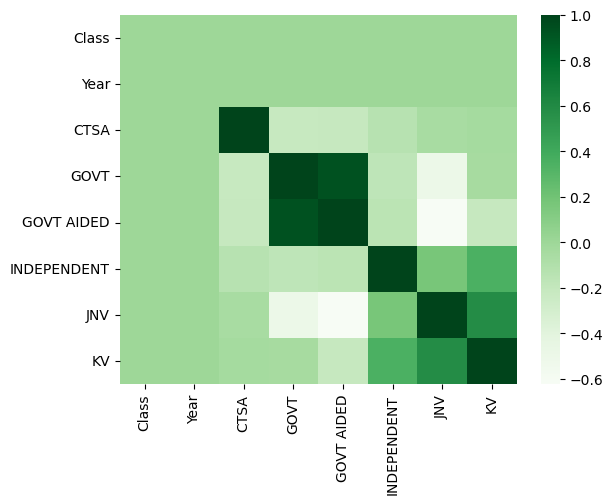

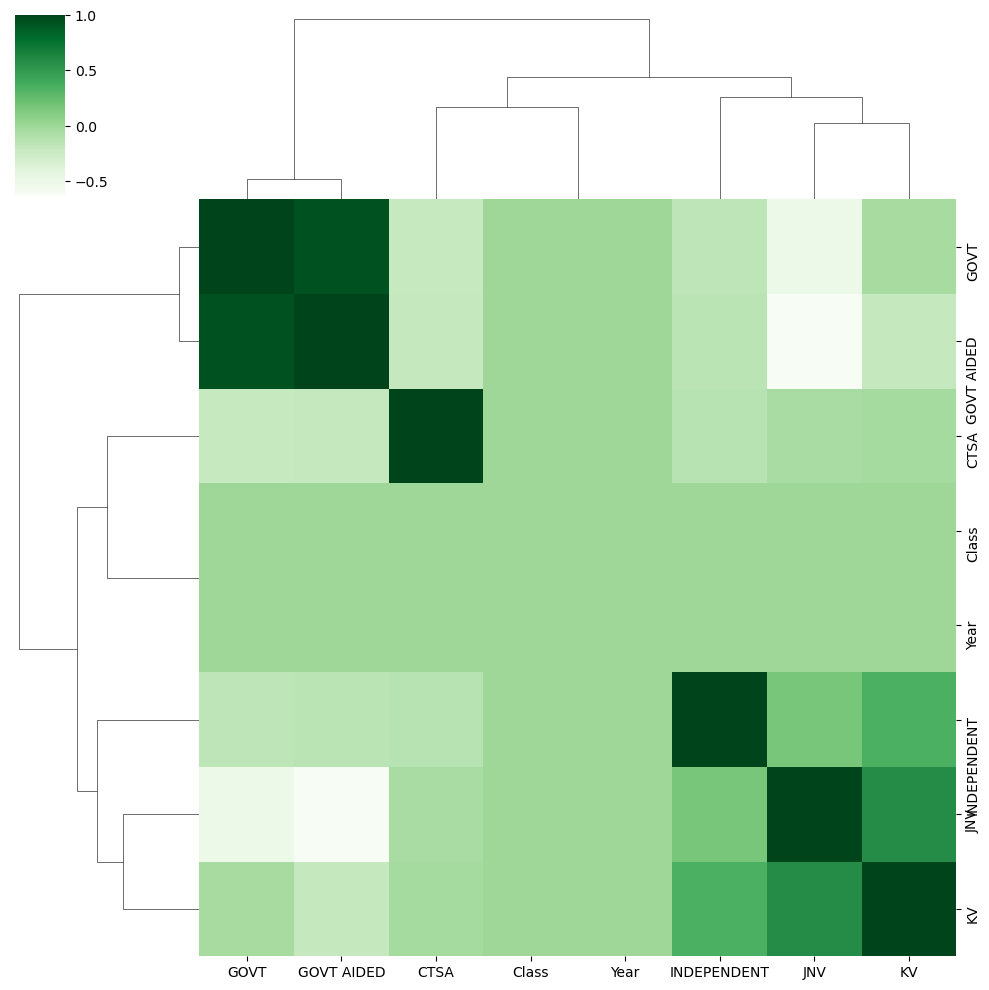

In [114]:
sns.heatmap(corel,cmap='Greens')
plt.show()

sns.clustermap(corel,cmap='Greens')
plt.show()

# Distribution of 'Region' column

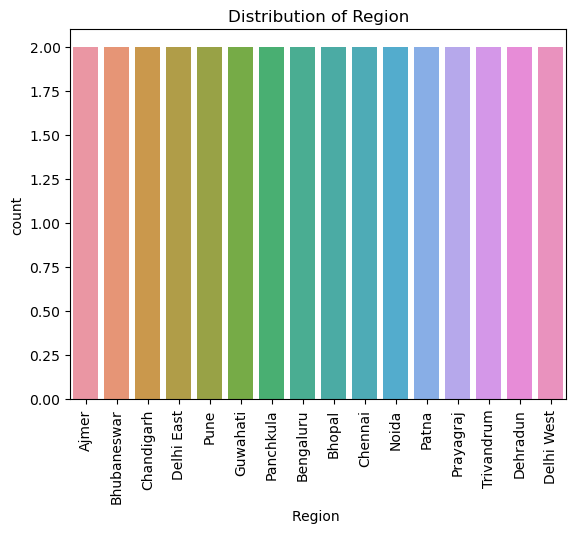

In [115]:
sns.countplot(data=df, x='Region ')
plt.title('Distribution of Region')
plt.xticks(rotation=90)
plt.show()

# Distribution of 'Status' column

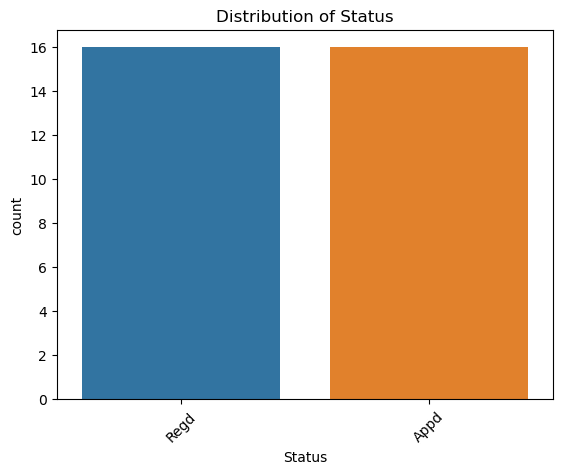

In [116]:
sns.countplot(data=df, x='Status')
plt.title('Distribution of Status')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'CTSA' column

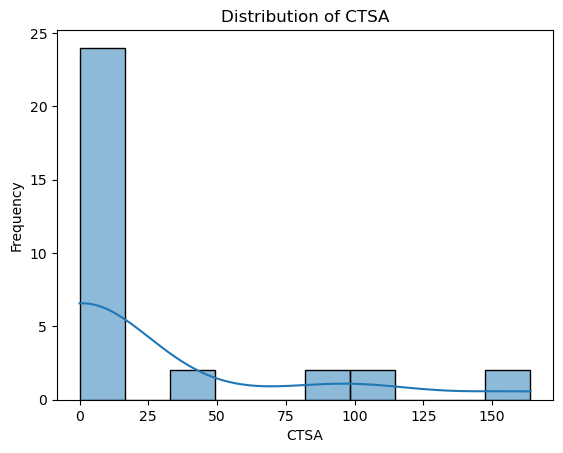

In [117]:
sns.histplot(data=df, x='CTSA', bins=10, kde=True)
plt.title('Distribution of CTSA')
plt.xlabel('CTSA')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'GOVT' column

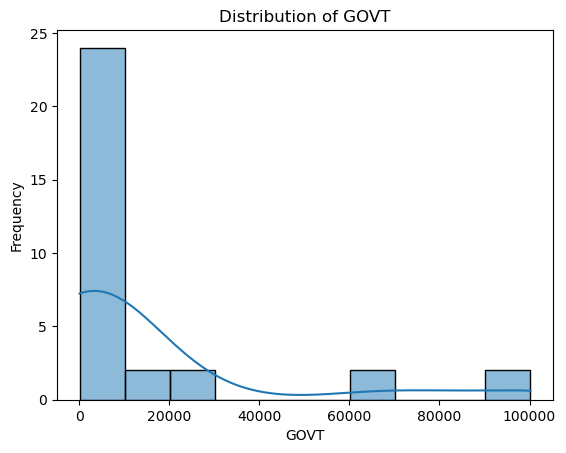

In [118]:
sns.histplot(data=df, x='GOVT', bins=10, kde=True)
plt.title('Distribution of GOVT')
plt.xlabel('GOVT')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'GOVT AIDED' column

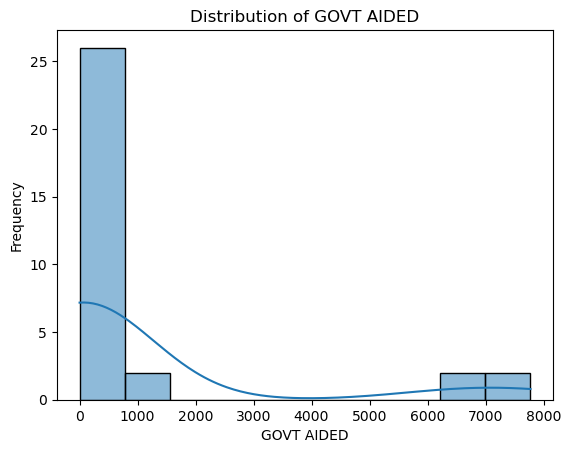

In [119]:
sns.histplot(data=df, x='GOVT AIDED', bins=10, kde=True)
plt.title('Distribution of GOVT AIDED')
plt.xlabel('GOVT AIDED')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'INDEPENDENT' column

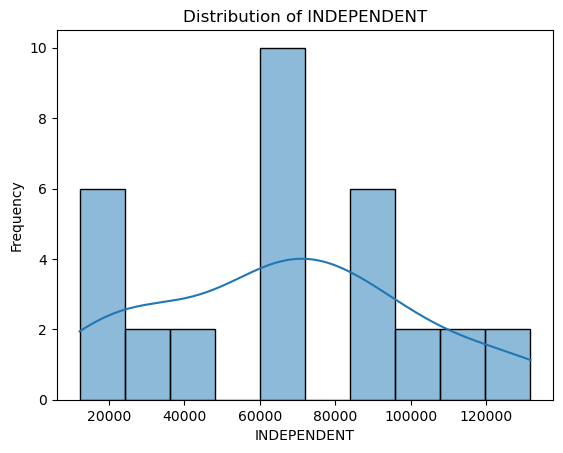

In [120]:
sns.histplot(data=df, x='INDEPENDENT', bins=10, kde=True)
plt.title('Distribution of INDEPENDENT')
plt.xlabel('INDEPENDENT')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'JNV' column

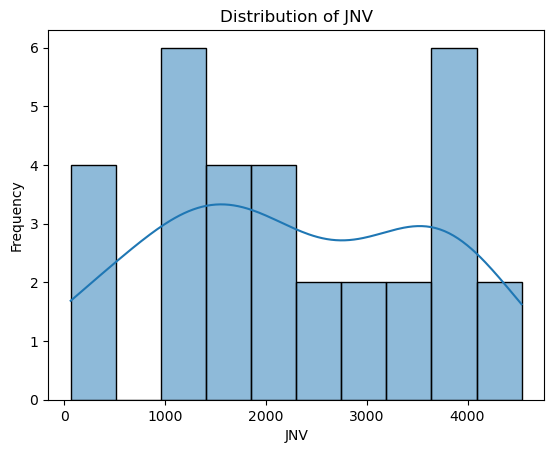

In [121]:
sns.histplot(data=df, x='JNV', bins=10, kde=True)
plt.title('Distribution of JNV')
plt.xlabel('JNV')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'KV' column

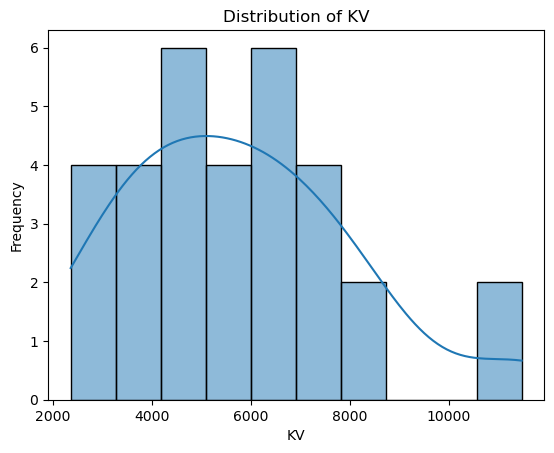

In [122]:
sns.histplot(data=df, x='KV', bins=10, kde=True)
plt.title('Distribution of KV')
plt.xlabel('KV')
plt.ylabel('Frequency')
plt.show()


# Relationships between numerical columns

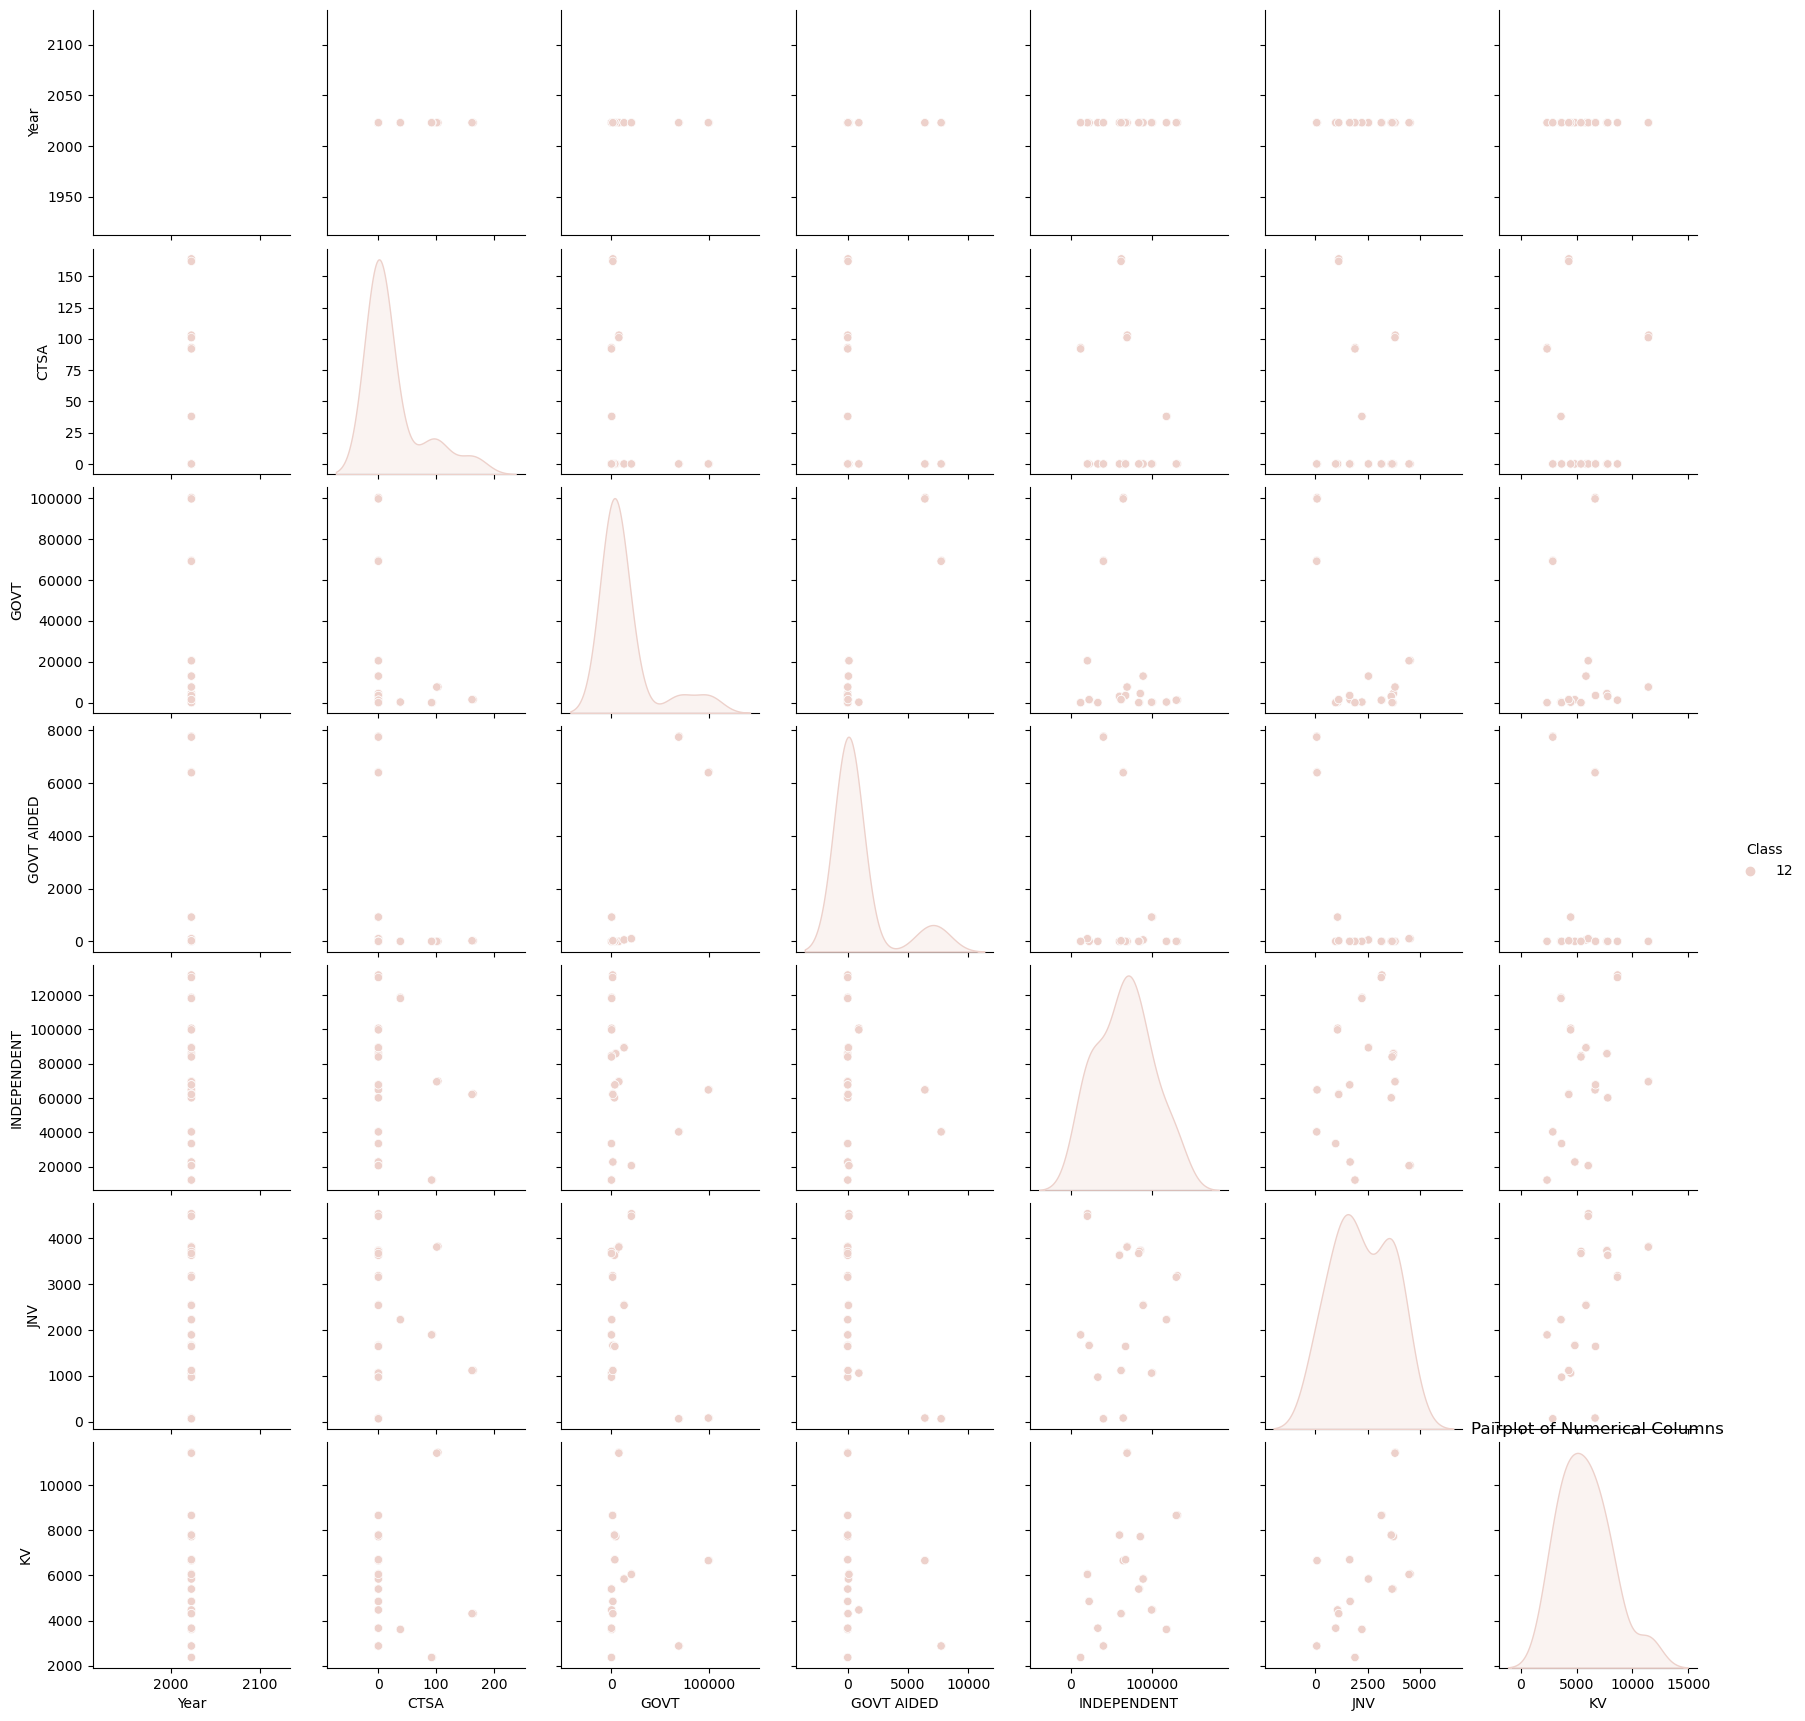

In [123]:
sns.pairplot(data=df, hue='Class')
plt.title('Pairplot of Numerical Columns')
plt.show()

# Box plots for numerical columns

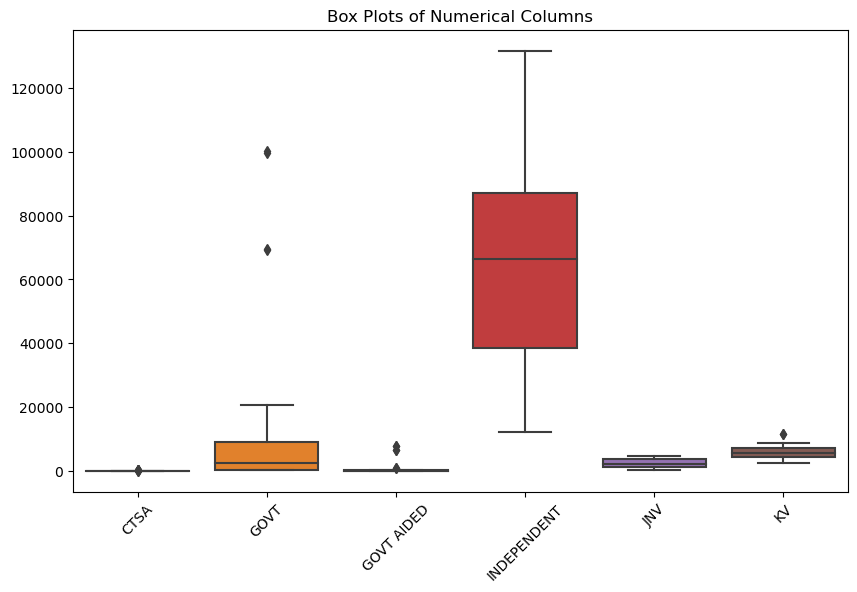

In [124]:
num_cols = ['CTSA', 'GOVT', 'GOVT AIDED', 'INDEPENDENT', 'JNV', 'KV']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

# Distribution of schools by region

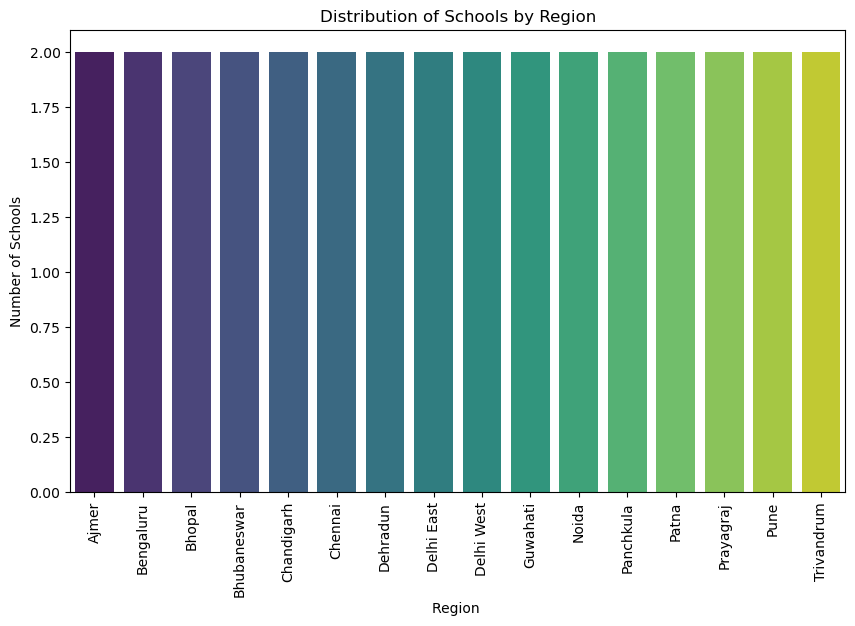

In [125]:
# Grouping data by region and calculating the total number of schools in each region
region_school_counts = df.groupby('Region ')['Class'].count().reset_index()
region_school_counts = region_school_counts.rename(columns={'Class': 'School Count'})
region_school_counts = region_school_counts.sort_values(by='School Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_school_counts, x='Region ', y='School Count', palette='viridis')
plt.title('Distribution of Schools by Region')
plt.xticks(rotation=90)
plt.xlabel('Region ')
plt.ylabel('Number of Schools')
plt.show()


# Distribution of 'Year' across regions

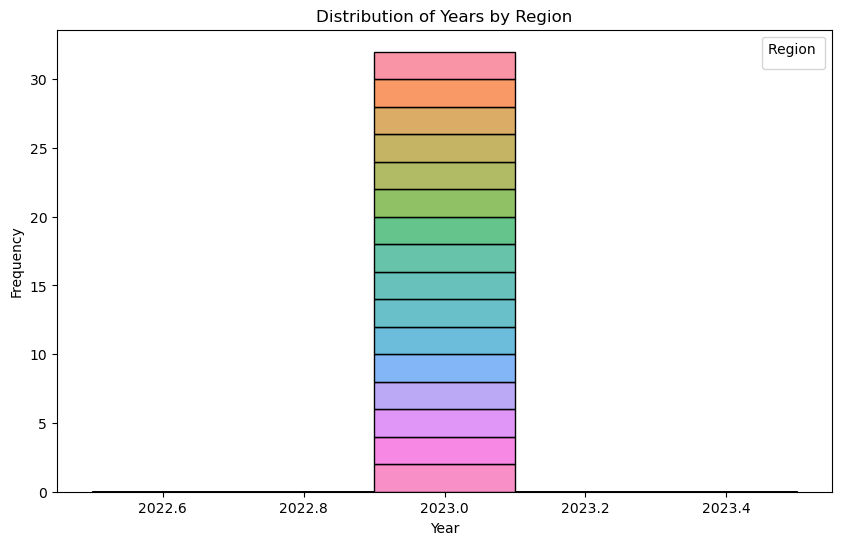

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Year', hue='Region ', multiple='stack', bins=5, kde=False)
plt.title('Distribution of Years by Region')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Region ')
plt.show()


# Box plot of 'Class' across regions

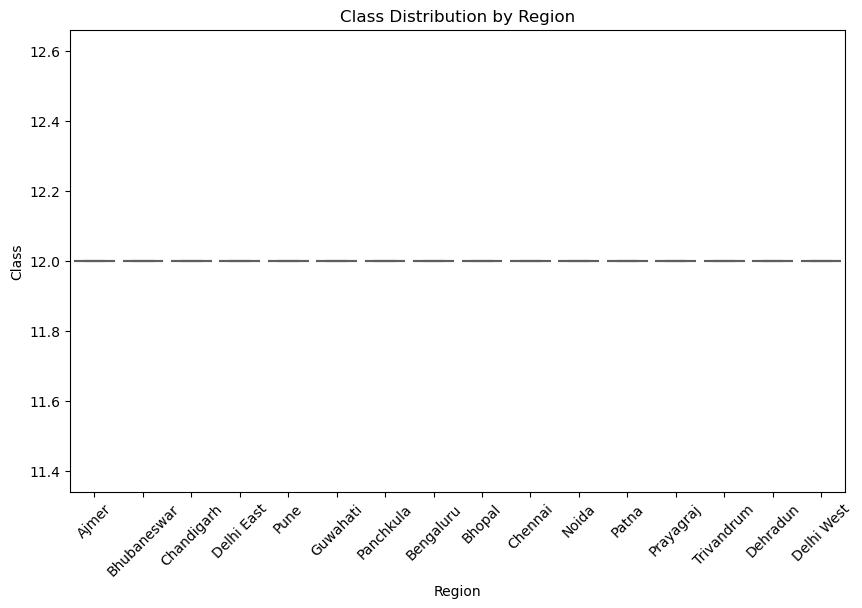

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region ', y='Class', palette='Set3')
plt.title('Class Distribution by Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Class')
plt.show()


# Pairplot of numerical columns across regions

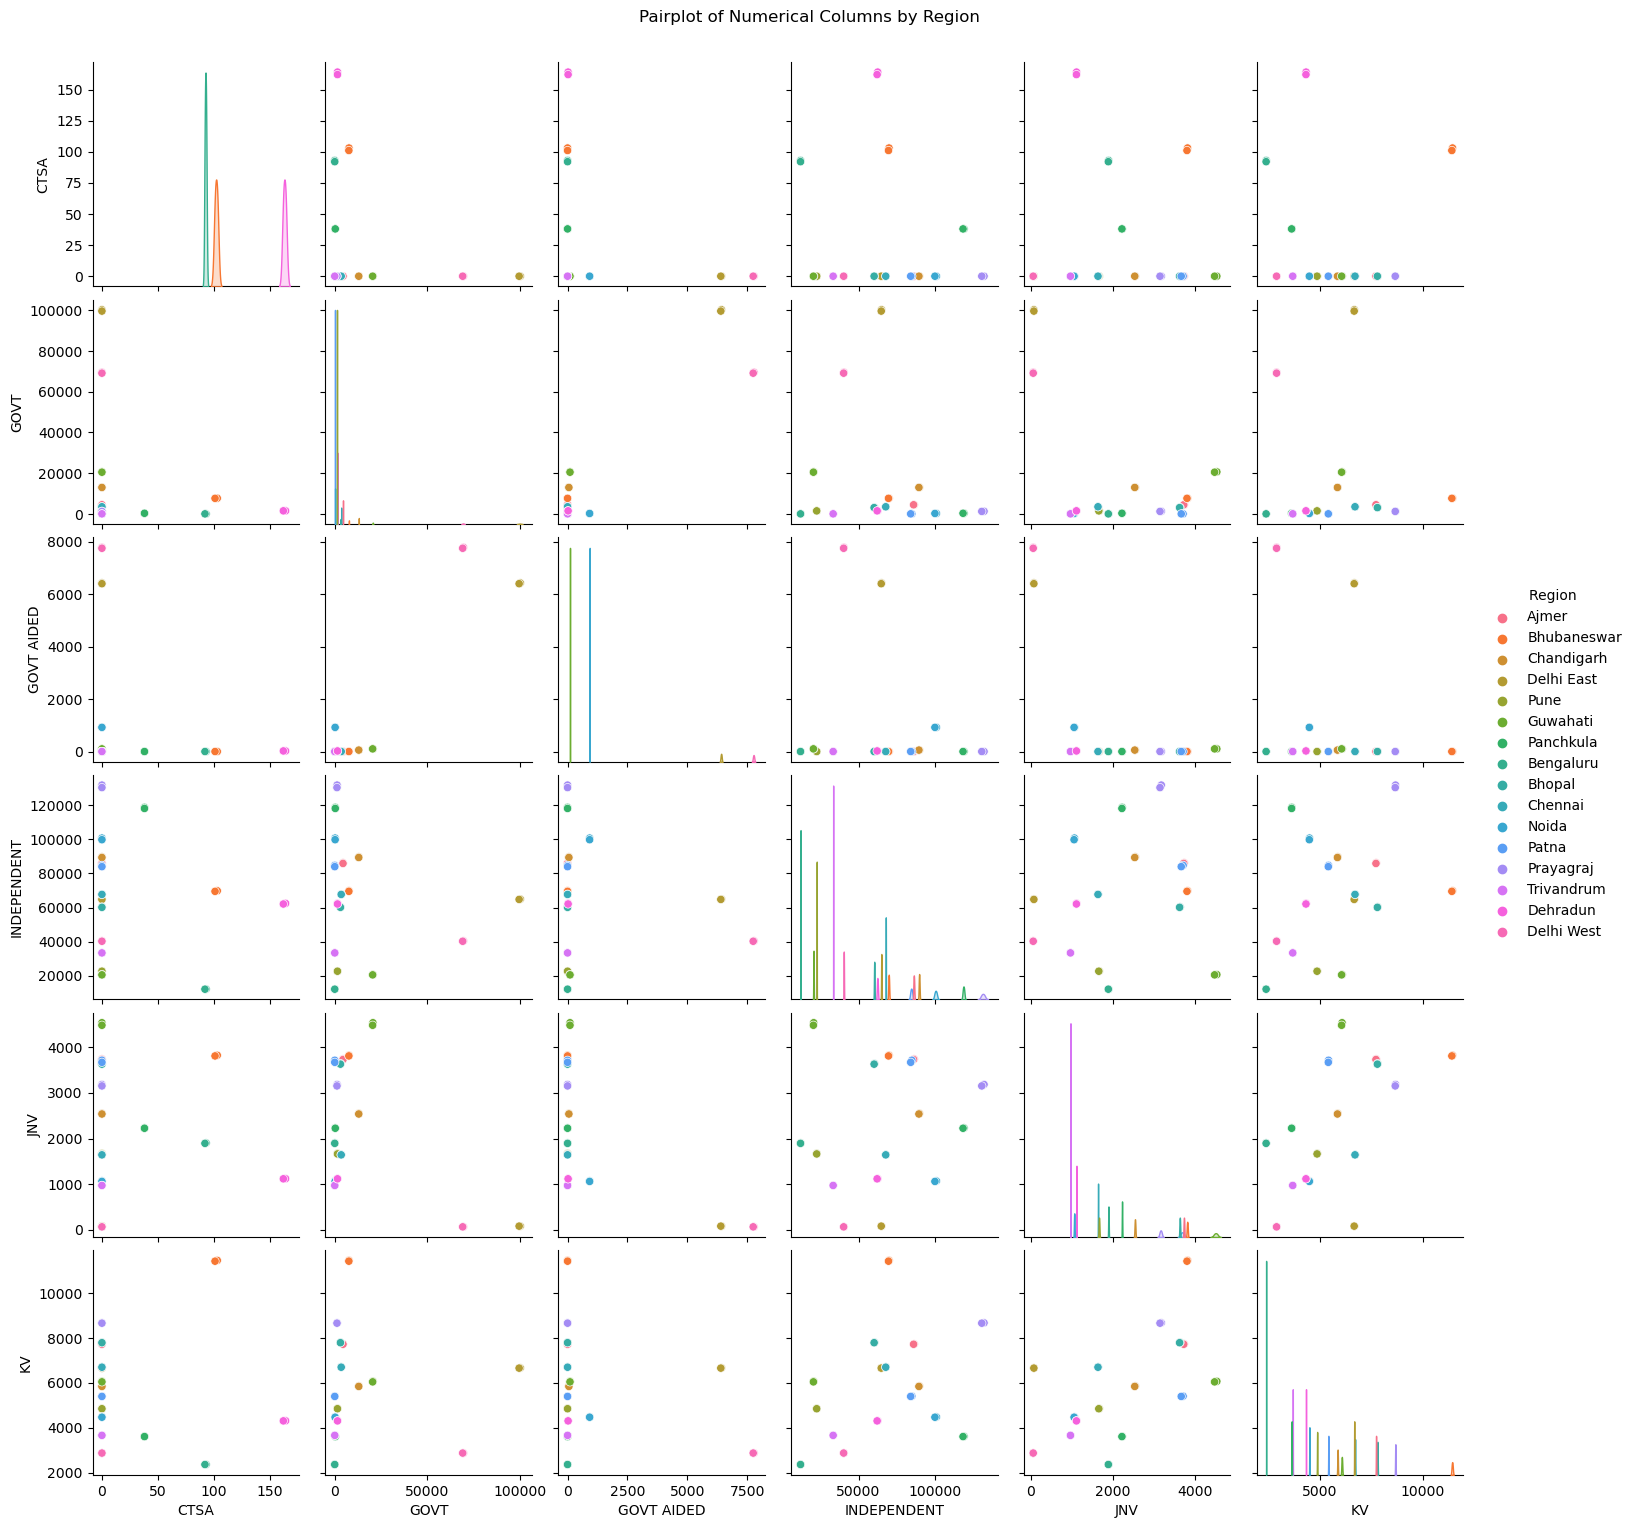

In [128]:
num_cols = ['CTSA', 'GOVT', 'GOVT AIDED', 'INDEPENDENT', 'JNV', 'KV']
sns.pairplot(data=df, hue='Region ', vars=num_cols)
plt.suptitle('Pairplot of Numerical Columns by Region', y=1.02)
plt.show()